In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.style.use('seaborn-dark-palette')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})

In [68]:
# Normalization

def normalize(df):
    df_norm = df.copy()
    s0 = df_norm .iloc[:,1:]
    df_norm.iloc[:,1:] = (s0 - s0.mean()) / (s0.max() - s0.min())
    return df_norm

# Total average consumption by consumer

In [66]:
by_consumer = pd.read_excel("../data/electricity/by_consumer_kwh_mean.xlsx")
by_consumer

,Year,Total,Domestic,Non-domestic,Industry,Agriculture
0,2013,4049.6,1966.6,8516.4,36195.9,1787.3
1,2014,3988.2,2007.3,8112.3,45053.2,4276.2
2,2015,4035.7,1988.6,8693.0,49935.3,5069.8
3,2016,4141.1,1983.4,11309.8,32372.6,2990.4
4,2017,4065.0,1881.8,10926.9,34874.4,4101.1
5,2018,3265.9,1952.4,10723.9,37550.8,3816.4
6,2019,3598.9,1895.9,10626.9,43384.9,3487.3
7,2020,3123.8,1976.1,9772.8,39462.6,3166.7


In [70]:
by_consumer_norm = normalize(by_consumer)
by_consumer_norm

,Year,Total,Domestic,Non-domestic,Industry,Agriculture
0,2013,0.261550,0.080378,-0.412463,-0.208272,-0.548241
1,2014,0.201194,0.404681,-0.538843,0.296053,0.209992
2,2015,0.247887,0.255677,-0.357232,0.574034,0.451759
3,2016,0.351494,0.214243,0.461157,-0.425966,-0.181721
4,2017,0.276688,-0.595319,0.341407,-0.283516,0.156649
5,2018,-0.508822,-0.032769,0.277920,-0.131125,0.069916
6,2019,-0.181485,-0.482968,0.247584,0.201062,-0.030343
7,2020,-0.648506,0.156076,-0.019531,-0.022269,-0.128012


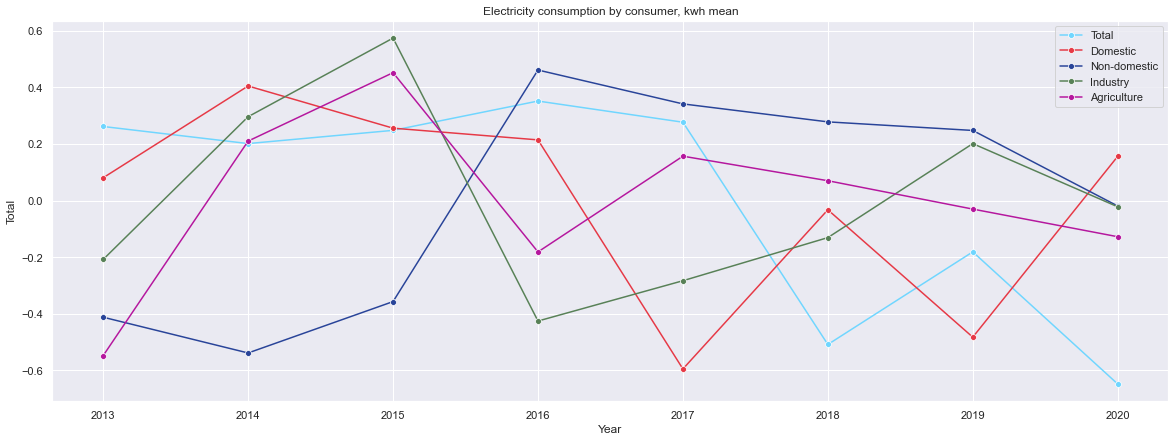

In [98]:
sns.set(rc={'figure.figsize': (20, 7)})
firstPlot = sns.lineplot(x=by_consumer_norm['Year'], y=by_consumer_norm['Total'], label="Total", marker = 'o', color='#70d6ff')
sns.lineplot(x=by_consumer_norm['Year'], y=by_consumer_norm['Domestic'], ax=firstPlot,  label="Domestic", marker = 'o', color='#e63946')
sns.lineplot(x=by_consumer_norm['Year'], y=by_consumer_norm['Non-domestic'], ax=firstPlot,  label="Non-domestic", marker = 'o', color='#294499')
sns.lineplot(x=by_consumer_norm['Year'], y=by_consumer_norm['Industry'], ax=firstPlot,  label="Industry", marker = 'o', color='#588157')
sns.lineplot(x=by_consumer_norm['Year'], y=by_consumer_norm['Agriculture'], ax=firstPlot,  label="Agriculture", marker = 'o', color='#b5179e').set_title("Electricity consumption by consumer, kwh mean")

plt.savefig('../charts/electricity/by_consumer.png')
plt.show(block=True)

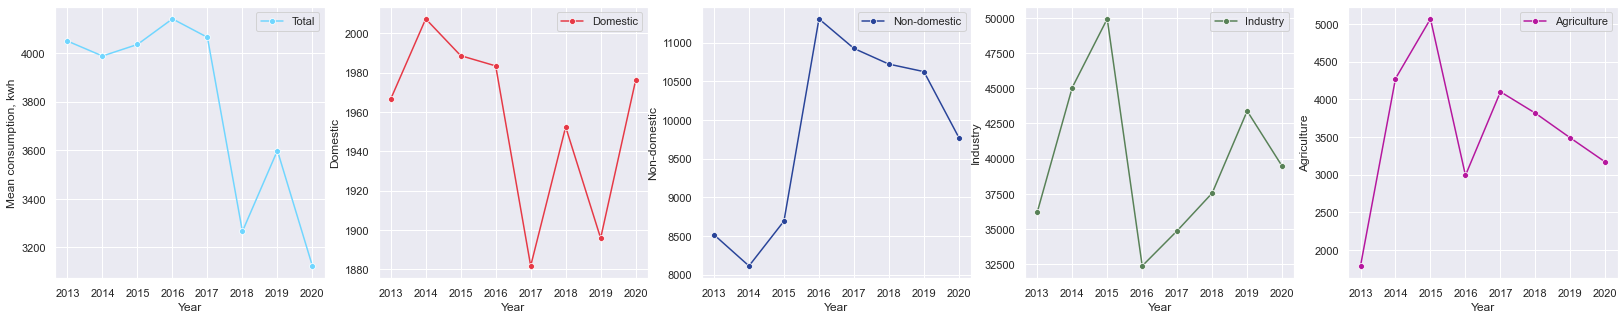

In [65]:
sns.set(rc={'figure.figsize': (28, 5)})
fig, axs = plt.subplots(ncols=5, nrows=1)
sns.lineplot(x=by_consumer['Year'], y=by_consumer['Total'], ax=axs[0], label='Total', marker = 'o', color='#70d6ff').set_ylabel("Mean consumption, kwh")
sns.lineplot(x=by_consumer['Year'], y=by_consumer['Domestic'], ax=axs[1],  label="Domestic", marker = 'o', color='#e63946')
sns.lineplot(x=by_consumer['Year'], y=by_consumer['Non-domestic'], ax=axs[2],  label="Non-domestic", marker = 'o', color='#294499')
sns.lineplot(x=by_consumer['Year'], y=by_consumer['Industry'], ax=axs[3],  label="Industry", marker = 'o', color='#588157')
sns.lineplot(x=by_consumer['Year'], y=by_consumer['Agriculture'], ax=axs[4],  label="Agriculture", marker = 'o', color='#b5179e')

plt.savefig('../charts/electricity/by_consumer_separate_plots.png')
plt.show(block=True)

# Total consumption by economic activity

In [78]:
by_economy = pd.read_excel("../data/electricity/by_economic_activity_kwh.xlsx")
by_economy

,Year,Total,Agriculture and Fishing,Mining and quarrying,Manufacturing,Construction,Wholesale and retail trade,Hotels and restaurants,Transport,Banks and Insurance,Others
0,2013,114437829,741739,357842,9738828,2269027,11462296,3911908,46362,658417,85251410
1,2014,112833176,1479580,200730,9968357,1943879,9992800,3888710,53558,856045,84449517
2,2015,114410714,1485453,173570,10441956,1663137,10147800,4018192,62570,874817,85543219
3,2016,117872391,657886,153256,11200859,1741739,11214616,4227992,68012,827276,87780755
4,2017,116502638,898133,161603,11940541,1728996,10878315,4092365,70777,735937,85995971
5,2018,119325937,759467,188848,13718733,1093040,9782442,4255141,73860,716928,88737478
6,2019,119842729,627721,195690,16014476,1063797,9603664,4926193,41002,622434,86747752
7,2020,116166383,573166,196399,14706415,1096614,9338972,3794488,10019,651358,85798952


In [79]:
by_economy_norm = normalize(by_economy)
by_economy_norm

,Year,Total,Agriculture and Fishing,Mining and quarrying,Manufacturing,Construction,Wholesale and retail trade,Hotels and restaurants,Transport,Banks and Insurance,Others
0,2013,-0.283348,-0.176648,0.754449,-0.394771,0.575822,0.546164,-0.200994,-0.108206,-0.334747,-0.241775
1,2014,-0.512272,0.632133,-0.013502,-0.358196,0.306041,-0.145909,-0.221492,0.004511,0.448301,-0.428785
2,2015,-0.287217,0.638571,-0.146258,-0.282730,0.073105,-0.072911,-0.107079,0.145674,0.522680,-0.173722
3,2016,0.206635,-0.268564,-0.245551,-0.161802,0.138322,0.429517,0.078305,0.230917,0.334311,0.348096
4,2017,0.011222,-0.005218,-0.204751,-0.043936,0.127749,0.271132,-0.041538,0.274228,-0.027595,-0.068135
5,2018,0.414001,-0.157216,-0.071580,0.239412,-0.399914,-0.244980,0.102295,0.322520,-0.102913,0.571215
6,2019,0.487728,-0.301629,-0.038137,0.605229,-0.424178,-0.329177,0.695251,-0.192165,-0.477320,0.107189
7,2020,-0.036749,-0.361429,-0.034671,0.396795,-0.396949,-0.453836,-0.304749,-0.677480,-0.362717,-0.114082


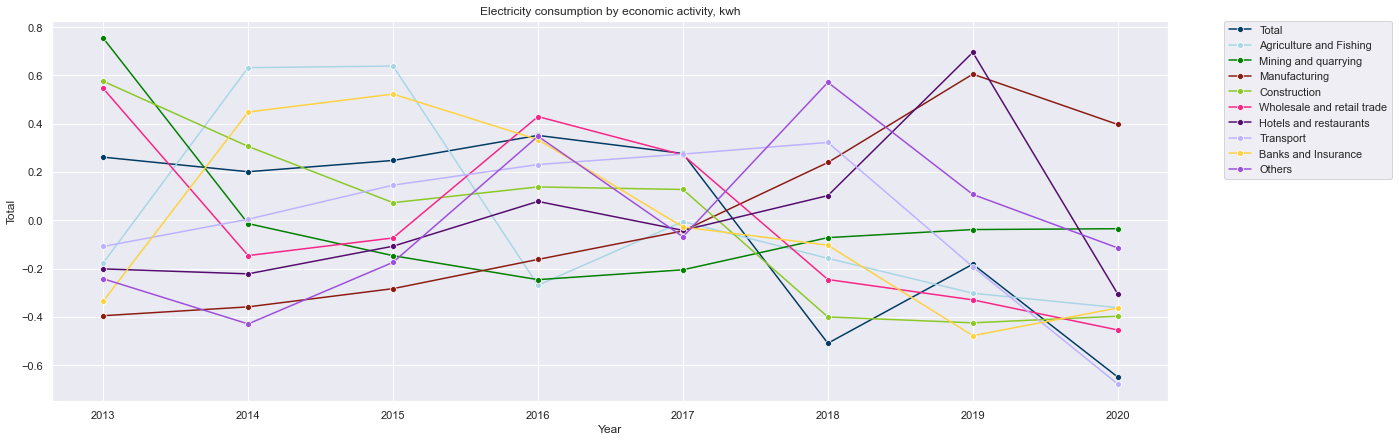

In [97]:
sns.set(rc={'figure.figsize': (20, 7)})
firstPlot = sns.lineplot(x=by_economy_norm['Year'], y=by_consumer_norm['Total'], label="Total", marker = 'o', color='#013a63')
sns.lineplot(x=by_economy_norm['Year'], y=by_economy_norm['Agriculture and Fishing'], ax=firstPlot,  label="Agriculture and Fishing", marker = 'o', color='#a9d6e5')
sns.lineplot(x=by_economy_norm['Year'], y=by_economy_norm['Mining and quarrying'], ax=firstPlot,  label="Mining and quarrying", marker = 'o', color='#008000')
sns.lineplot(x=by_economy_norm['Year'], y=by_economy_norm['Manufacturing'], ax=firstPlot,  label="Manufacturing", marker = 'o', color='#8c1c13')
sns.lineplot(x=by_economy_norm['Year'], y=by_economy_norm['Construction'], ax=firstPlot,  label="Construction", marker = 'o', color='#8ac926')
sns.lineplot(x=by_economy_norm['Year'], y=by_economy_norm['Wholesale and retail trade'], ax=firstPlot,  label="Wholesale and retail trade", marker = 'o', color='#f72585')
sns.lineplot(x=by_economy_norm['Year'], y=by_economy_norm['Hotels and restaurants'], ax=firstPlot,  label="Hotels and restaurants", marker = 'o', color='#540d6e')
sns.lineplot(x=by_economy_norm['Year'], y=by_economy_norm['Transport'], ax=firstPlot,  label="Transport", marker = 'o', color='#bdb2ff')
sns.lineplot(x=by_economy_norm['Year'], y=by_economy_norm['Banks and Insurance'], ax=firstPlot,  label="Banks and Insurance", marker = 'o', color='#ffd23f')
sns.lineplot(x=by_economy_norm['Year'], y=by_economy_norm['Others'], ax=firstPlot,  label="Others", marker = 'o', color='#9d4edd').set_title("Electricity consumption by economic activity, kwh")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('../charts/electricity/by_economic_activity.png')
plt.show(block=True)

# Per inhabitant

In [94]:
# kwh/inhabitant

per_inhabitant = pd.read_excel("../data/electricity/per_inhabitant.xlsx")
per_inhabitant

,Year,Total,Domestic,Non-domestic,Industry,Agriculture,Street lightning,Government buildings
0,2013,3285.4,1324.6,977.5,401.1,21.3,239.9,321.0
1,2014,3269.5,1359.6,1001.6,403.4,42.9,229.9,232.0
2,2015,3346.6,1377.1,1043.3,407.5,43.5,229.9,245.3
3,2016,3477.1,1429.7,1115.0,445.0,19.4,213.9,254.1
4,2017,3455.3,1369.5,1118.7,466.5,26.6,224.4,249.5
5,2018,3548.5,1434.2,1119.4,500.3,22.6,217.9,254.2
6,2019,3567.1,1408.9,1107.1,573.4,18.7,212.0,247.1
7,2020,3401.0,1459.1,994.5,525.7,16.8,187.6,217.2


In [96]:
per_inhabitant_norm = normalize(per_inhabitant)
per_inhabitant_norm 

,Year,Total,Domestic,Non-domestic,Industry,Agriculture,Street lightning,Government buildings
0,2013,-0.448295,-0.525929,-0.578841,-0.372969,-0.193820,0.391252,0.659441
1,2014,-0.501722,-0.265706,-0.409003,-0.359620,0.615169,0.200048,-0.197977
2,2015,-0.242650,-0.135595,-0.115134,-0.335824,0.637640,0.200048,-0.069846
3,2016,0.195859,0.255483,0.390152,-0.118180,-0.264981,-0.105880,0.014933
4,2017,0.122606,-0.192100,0.416226,0.006602,0.004682,0.094885,-0.029383
5,2018,0.435778,0.288941,0.421159,0.202771,-0.145131,-0.029398,0.015896
6,2019,0.498278,0.100836,0.334479,0.627031,-0.291199,-0.142208,-0.052505
7,2020,-0.059854,0.474071,-0.459038,0.350189,-0.362360,-0.608748,-0.340559


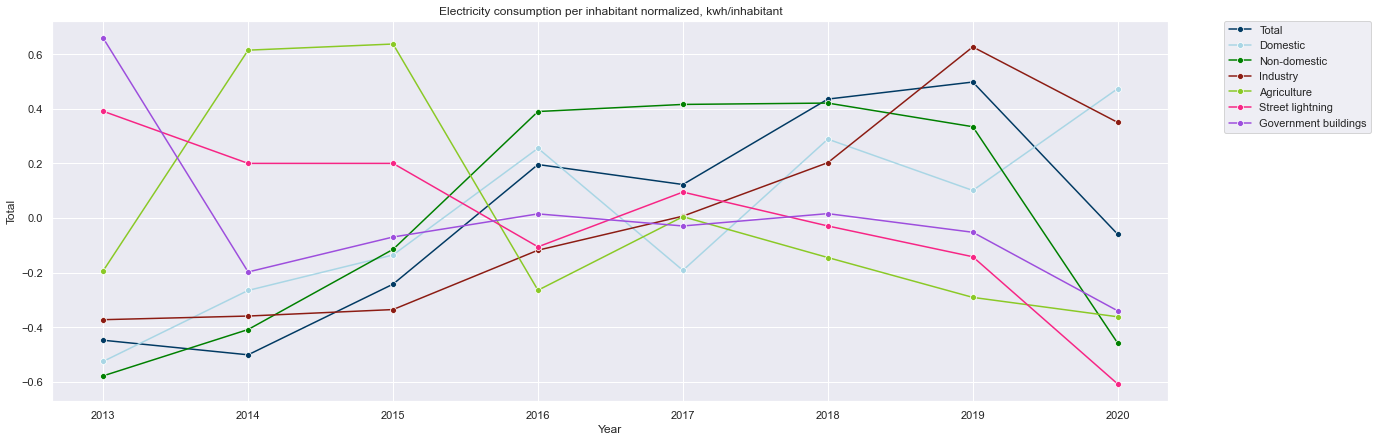

In [102]:
sns.set(rc={'figure.figsize': (20, 7)})
firstPlot = sns.lineplot(x=per_inhabitant_norm['Year'], y=per_inhabitant_norm['Total'], label="Total", marker = 'o', color='#013a63')
sns.lineplot(x=per_inhabitant_norm['Year'], y=per_inhabitant_norm['Domestic'], ax=firstPlot,  label="Domestic", marker = 'o', color='#a9d6e5')
sns.lineplot(x=per_inhabitant_norm['Year'], y=per_inhabitant_norm['Non-domestic'], ax=firstPlot,  label="Non-domestic", marker = 'o', color='#008000')
sns.lineplot(x=per_inhabitant_norm['Year'], y=per_inhabitant_norm['Industry'], ax=firstPlot,  label="Industry", marker = 'o', color='#8c1c13')
sns.lineplot(x=per_inhabitant_norm['Year'], y=per_inhabitant_norm['Agriculture'], ax=firstPlot,  label="Agriculture", marker = 'o', color='#8ac926')
sns.lineplot(x=per_inhabitant_norm['Year'], y=per_inhabitant_norm['Street lightning'], ax=firstPlot,  label="Street lightning", marker = 'o', color='#f72585')
sns.lineplot(x=per_inhabitant_norm['Year'], y=per_inhabitant_norm['Government buildings'], ax=firstPlot,  label="Government buildings", marker = 'o', color='#9d4edd').set_title("Electricity consumption per inhabitant normalized, kwh/inhabitant")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('../charts/electricity/per_inhabitant_norm.png')
plt.show(block=True)

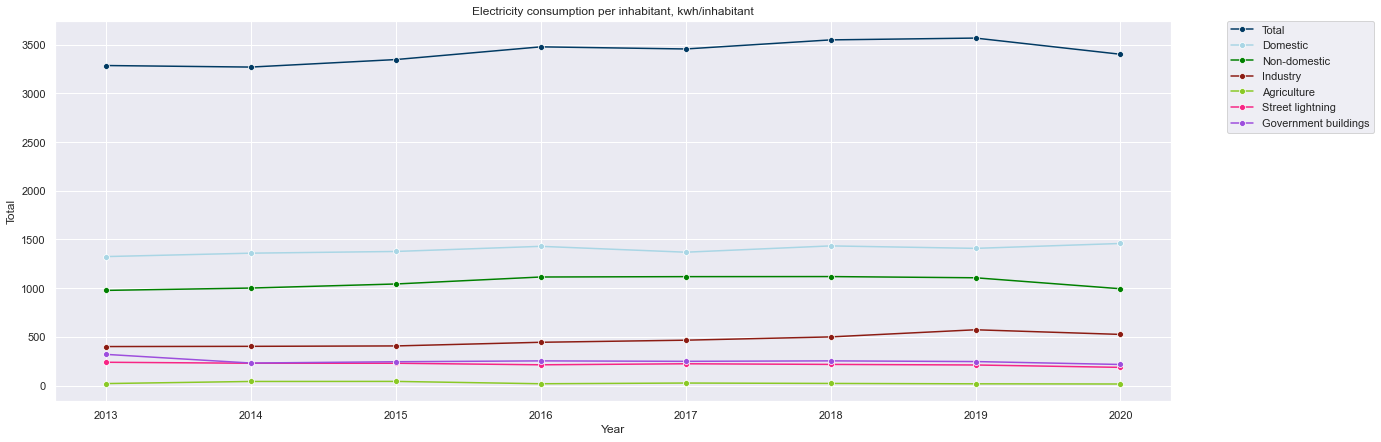

In [103]:
sns.set(rc={'figure.figsize': (20, 7)})
firstPlot = sns.lineplot(x=per_inhabitant['Year'], y=per_inhabitant['Total'], label="Total", marker = 'o', color='#013a63')
sns.lineplot(x=per_inhabitant['Year'], y=per_inhabitant['Domestic'], ax=firstPlot,  label="Domestic", marker = 'o', color='#a9d6e5')
sns.lineplot(x=per_inhabitant['Year'], y=per_inhabitant['Non-domestic'], ax=firstPlot,  label="Non-domestic", marker = 'o', color='#008000')
sns.lineplot(x=per_inhabitant['Year'], y=per_inhabitant['Industry'], ax=firstPlot,  label="Industry", marker = 'o', color='#8c1c13')
sns.lineplot(x=per_inhabitant['Year'], y=per_inhabitant['Agriculture'], ax=firstPlot,  label="Agriculture", marker = 'o', color='#8ac926')
sns.lineplot(x=per_inhabitant['Year'], y=per_inhabitant['Street lightning'], ax=firstPlot,  label="Street lightning", marker = 'o', color='#f72585')
sns.lineplot(x=per_inhabitant['Year'], y=per_inhabitant['Government buildings'], ax=firstPlot,  label="Government buildings", marker = 'o', color='#9d4edd').set_title("Electricity consumption per inhabitant, kwh/inhabitant")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('../charts/electricity/per_inhabitant.png')
plt.show(block=True)

# By type consumption individual

In [105]:
by_consumer_individual= pd.read_excel("../data/electricity/by_type_of_consumption_individual.xlsx")
by_consumer_individual

,Year,Total,Domestic,Non-domestic,Industry,Agriculture
0,2013,28259,23460,3998,386,415
1,2014,28292,23376,4261,309,346
2,2015,28350,23675,4103,279,293
3,2016,28464,24436,3342,466,220
4,2017,28660,24538,3452,451,219
5,2018,28858,24701,3510,448,199
6,2019,29090,24966,3500,444,180
7,2020,29333,25221,3476,455,181


In [109]:
by_consumer_individual_norm = normalize(by_consumer_individual)
by_consumer_individual_norm            

,Year,Total,Domestic,Non-domestic,Industry,Agriculture
0,2013,-0.376397,-0.453455,0.318553,-0.100267,0.673936
1,2014,-0.345670,-0.498984,0.604733,-0.512032,0.380319
2,2015,-0.291667,-0.336924,0.432807,-0.672460,0.154787
3,2016,-0.185521,0.075542,-0.395267,0.327540,-0.155851
4,2017,-0.003026,0.130827,-0.275571,0.247326,-0.160106
5,2018,0.181331,0.219173,-0.212459,0.231283,-0.245213
6,2019,0.397346,0.362805,-0.223341,0.209893,-0.326064
7,2020,0.623603,0.501016,-0.249456,0.268717,-0.321809


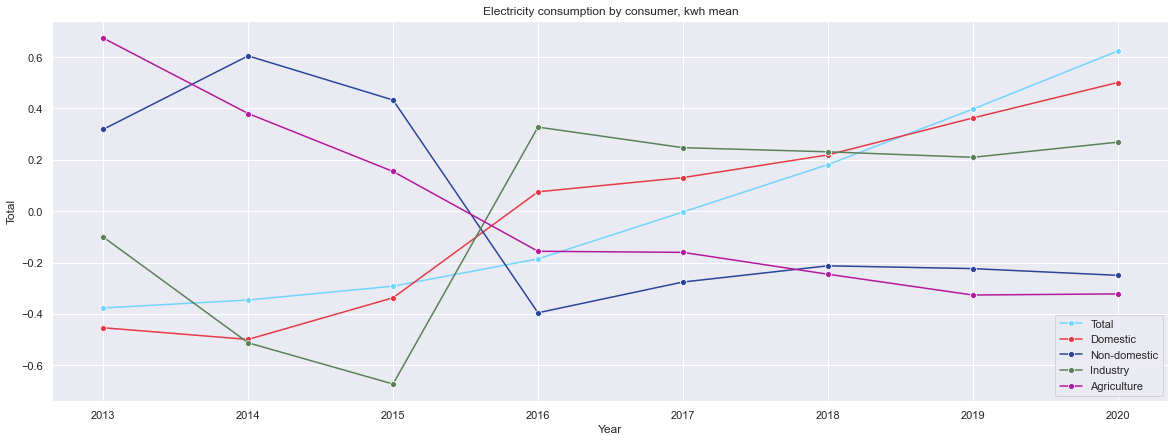

In [110]:
sns.set(rc={'figure.figsize': (20, 7)})
firstPlot = sns.lineplot(x=by_consumer_individual_norm['Year'], y=by_consumer_individual_norm['Total'], label="Total", marker = 'o', color='#70d6ff')
sns.lineplot(x=by_consumer_individual_norm['Year'], y=by_consumer_individual_norm['Domestic'], ax=firstPlot,  label="Domestic", marker = 'o', color='#e63946')
sns.lineplot(x=by_consumer_individual_norm['Year'], y=by_consumer_individual_norm['Non-domestic'], ax=firstPlot,  label="Non-domestic", marker = 'o', color='#294499')
sns.lineplot(x=by_consumer_individual_norm['Year'], y=by_consumer_individual_norm['Industry'], ax=firstPlot,  label="Industry", marker = 'o', color='#588157')
sns.lineplot(x=by_consumer_individual_norm['Year'], y=by_consumer_individual_norm['Agriculture'], ax=firstPlot,  label="Agriculture", marker = 'o', color='#b5179e').set_title("Electricity consumption by consumer, kwh mean")
plt.savefig('../charts/electricity/by_consumer_individual.png')
plt.show(block=True)